# CSC478 - Assignment 2: Part 3
## Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os

In [2]:
os.getcwd()

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW2'

In [3]:
#Replacing all "?" (missing values) with NaN
adult_data=pd.read_csv('adult-modified.csv',na_values = '?')
adult_data.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [4]:
adult_data.dtypes

age               float64
workclass          object
education           int64
marital-status     object
race               object
sex                object
hours-per-week      int64
income             object
dtype: object

In [5]:
adult_data.shape

(10000, 8)

In [6]:
adult_data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

# Part 3.a) Preprocessing and data analysis:
# Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [7]:
adult_data.describe(include='all')

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [8]:
#Examining missing values in each of the columns
adult_data.workclass.value_counts(dropna=False)

Private     6947
Public      1317
Self-emp    1148
NaN          588
Name: workclass, dtype: int64

In [9]:
adult_data.education.value_counts(dropna=False)

9     3232
10    2305
13    1630
14     531
11     416
7      363
12     318
6      295
4      205
15     174
5      153
16     116
8      109
3       88
2       49
1       16
Name: education, dtype: int64

In [10]:
adult_data['marital-status'].value_counts(dropna=False)

Single     5017
Married    4983
Name: marital-status, dtype: int64

In [11]:
adult_data.race.value_counts(dropna=False)

White          8556
Black           953
Asian           309
Amer-Indian      99
Hispanic         83
Name: race, dtype: int64

In [12]:
adult_data.sex.value_counts(dropna=False)

Male      6703
Female    3297
Name: sex, dtype: int64

In [13]:
adult_data['hours-per-week'].value_counts(dropna=False)

40    4655
50     872
45     557
60     487
35     389
30     367
20     362
55     206
25     190
48     156
38     155
15     104
10      92
24      91
70      86
32      73
36      73
42      70
65      70
16      68
44      65
43      52
12      50
8       50
80      48
52      47
37      39
56      33
28      30
75      29
      ... 
53       8
17       7
9        7
66       7
14       7
13       7
11       5
34       5
85       5
64       4
59       4
98       4
63       4
7        4
62       3
23       3
19       3
51       3
78       3
57       2
31       2
68       2
29       2
77       1
73       1
94       1
88       1
97       1
89       1
87       1
Name: hours-per-week, dtype: int64

In [14]:
#Imputing mean for the missing values in 'age' column
age_mean= adult_data.age.mean()
adult_data.age.fillna(age_mean,inplace=True)
#check if there are any more missing values
adult_data[adult_data.age.isnull()==True]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [15]:
#Removing missing values from the categorical 'workclass' attribute
adult_data.dropna(axis=0,inplace=True)
adult_data[adult_data.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [16]:
adult_data.shape

(9412, 8)

# b) Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [17]:
#First row of the dataframe
adult_data.ix[0,:]

age                   39
workclass         Public
education             13
marital-status    Single
race               White
sex                 Male
hours-per-week        40
income             <=50K
Name: 0, dtype: object

In [18]:
#Descriptive statistics for the numerical attributes
adult_data.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [19]:
#Descriptive statistics for the categorical attributes
adult_data[["workclass","marital-status","race","sex","income"]].describe()

,workclass,marital-status,race,sex,income
count,9412,9412,9412,9412,9412
unique,3,2,5,2,2
top,Private,Married,White,Male,<=50K
freq,6947,4737,8062,6383,7093


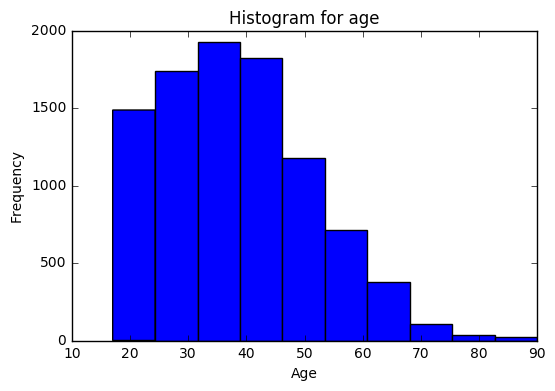

In [20]:
#Histogram for age
adult_data.age.plot(kind='hist',bins=10)
plt.xlabel("Age")
plt.title("Histogram for age")
plt.show()

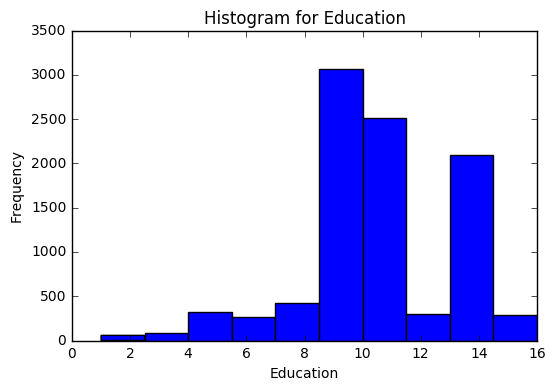

In [21]:
#Histogram for education
adult_data.education.plot(kind='hist',bins=10)
plt.xlabel("Education")
plt.title("Histogram for Education")
plt.show()

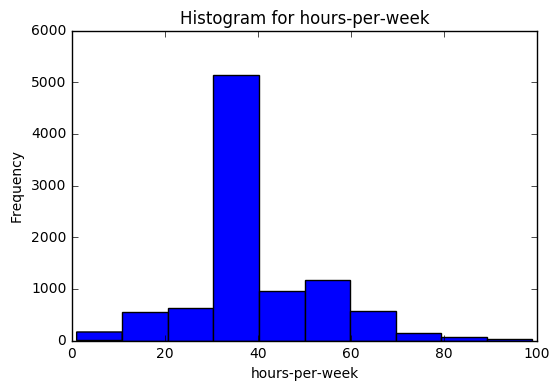

In [22]:
#Histogram for hours-per-week
adult_data['hours-per-week'].plot(kind='hist',bins=10)
plt.xlabel("hours-per-week")
plt.title("Histogram for hours-per-week")
plt.show()

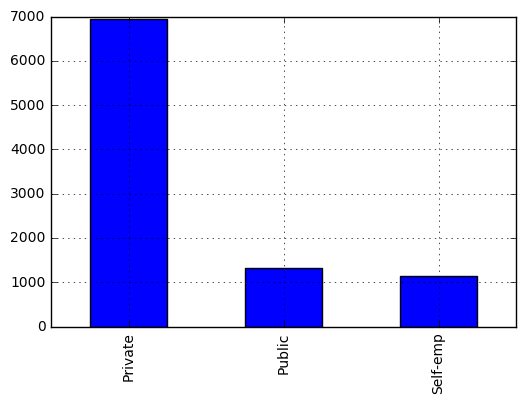

In [23]:
#Bar plot for workclass attribute
adult_data.workclass.value_counts().plot(kind='bar',grid=True)

In [24]:
adult_data.workclass.value_counts()

Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [25]:
#BAr plot for Sex and race
print(adult_data.sex.value_counts())
print('\n')
print(adult_data.race.value_counts())
print('\n')
print(adult_data['marital-status'].value_counts())

Male      6383
Female    3029
Name: sex, dtype: int64


White          8062
Black           892
Asian           291
Amer-Indian      92
Hispanic         75
Name: race, dtype: int64


Married    4737
Single     4675
Name: marital-status, dtype: int64


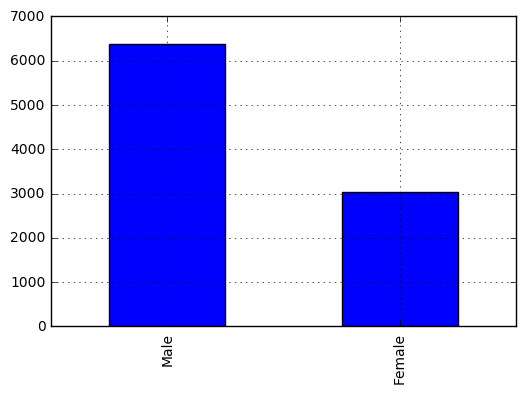

In [26]:
adult_data.sex.value_counts().plot(kind='bar',grid=True)

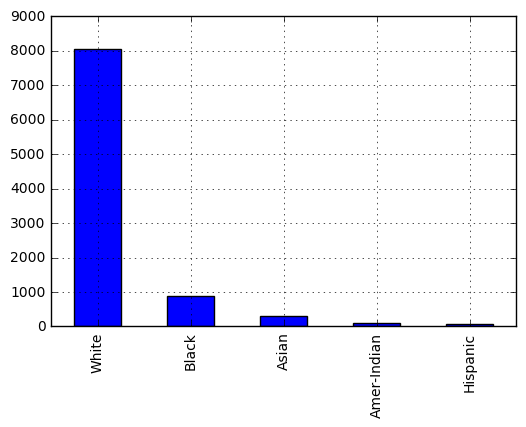

In [27]:
adult_data.race.value_counts().plot(kind='bar',grid=True)

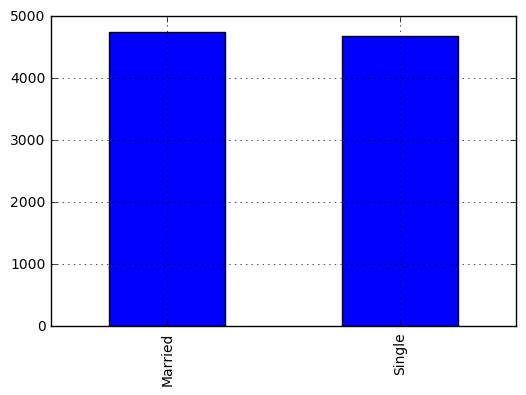

In [28]:
adult_data['marital-status'].value_counts().plot(kind='bar',grid=True)

In [29]:
adult_data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [30]:
#Taking a look at the distirbutions of numerical attributes when grouped over categorical attributes
adult_data.groupby("workclass").mean()

,age,education,hours-per-week
workclass,,,
Private,36.798284,9.890600,40.388225
Public,40.946806,11.098709,40.449506
Self-emp,44.894942,10.428571,45.991289


In [31]:
adult_data.groupby("marital-status").mean()

,age,education,hours-per-week
marital-status,,,
Married,43.275328,10.253114,43.251847
Single,33.392253,9.995722,38.879786


In [32]:
adult_data.groupby("race").mean()

,age,education,hours-per-week
race,,,
Amer-Indian,36.949450,9.119565,41.434783
Asian,37.779034,10.941581,41.116838
Black,38.018662,9.582960,38.456278
Hispanic,33.739331,8.853333,42.666667
White,38.485223,10.179112,41.350409


In [33]:
adult_data.groupby("sex").mean()

,age,education,hours-per-week
sex,,,
Female,37.013549,10.095081,37.257511
Male,39.008299,10.139590,42.894250


In [34]:
adult_data.groupby("income").mean()

,age,education,hours-per-week
income,,,
<=50K,36.644604,9.646976,39.567038
>50K,43.632531,11.588185,45.708495


# 3.c) Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [35]:
#education+race
tab1=pd.crosstab(adult_data["education"],adult_data["race"])
tab1

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


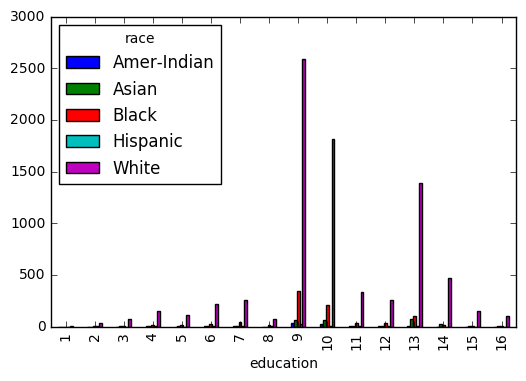

In [36]:
tab1.plot.bar()

In [37]:
#work-class+income
tab2 = pd.crosstab(adult_data['workclass'],adult_data['income'])
tab2

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


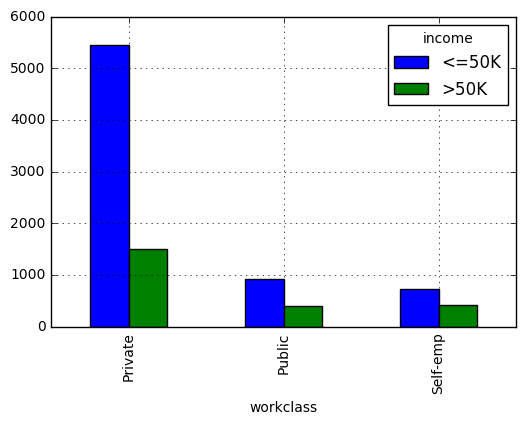

In [38]:
tab2.plot.bar(grid=True)

In [39]:
#work-class+race
tab3 = pd.crosstab(adult_data['workclass'],adult_data['race'])
tab3

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


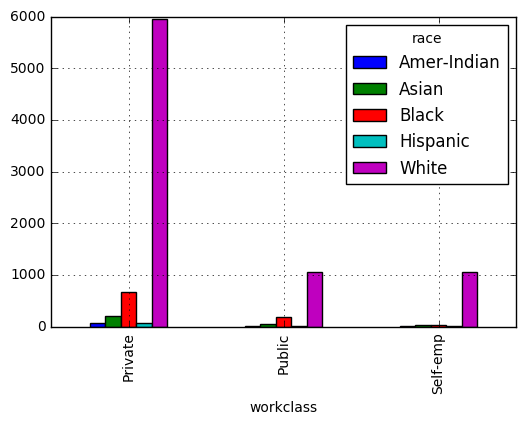

In [40]:
tab3.plot.bar(grid=True)

In [41]:
#race+income
tab4 = pd.crosstab(adult_data['race'],adult_data['income'])
tab4

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


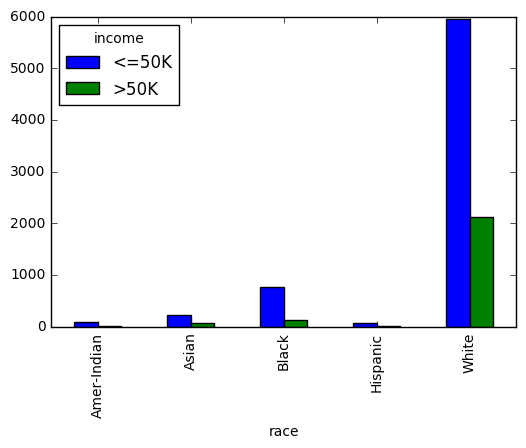

In [42]:
tab4.plot.bar()

In [43]:
#(race+income) also create a table or chart showing percentages of each race category that fall in the low-income group

tab4.apply(lambda x: (x/x.sum())*100,axis=1)


income,<=50K,>50K
race,,
Amer-Indian,90.217391,9.782609
Asian,76.975945,23.024055
Black,86.659193,13.340807
Hispanic,92.000000,8.000000
White,73.728603,26.271397


In [44]:
tab4.apply(lambda x: (x/x.sum())*100,axis=0)

income,<=50K,>50K
race,,
Amer-Indian,1.170168,0.388098
Asian,3.158043,2.889176
Black,10.898069,5.131522
Hispanic,0.972790,0.258732
White,83.800930,91.332471


# Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [45]:
adult_data.groupby(["income","education"])["income"].count()

income  education
<=50K   1              12
        2              45
        3              76
        4             164
        5             135
        6             245
        7             310
        8              93
        9            2539
        10           1737
        11            298
        12            221
        13            921
        14            225
        15             45
        16             27
>50K    2               1
        3               5
        4              16
        5               7
        6              23
        7              14
        8               7
        9             526
        10            388
        11             91
        12             83
        13            656
        14            290
        15            126
        16             86
Name: income, dtype: int64

## Part 3.b) Predictive Modeling and Model Evaluation:

### Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [46]:
df_ssf = pd.get_dummies(adult_data)
df_ssf.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50.0,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38.0,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53.0,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28.0,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [47]:
df_adult_X = df_ssf.drop(['income_<=50K','income_>50K'], axis=1, inplace = False)
df_adult_Y = df_ssf['income_>50K']

In [48]:
df_adult_X.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
df_adult_Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: income_>50K, dtype: float64

## Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [50]:
#(Gaussian) naive Bayes classifier
from sklearn import naive_bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(df_adult_X, df_adult_Y)

from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(nbclf, df_adult_X, df_adult_Y, cv=10)
cv_scores
print("Overall Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy Using Cross Validation: 0.72 (+/- 0.02)


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
#Decision tree
from sklearn.tree import tree

treeclf = tree.DecisionTreeClassifier(criterion='entropy',random_state=9)
treeclf = treeclf.fit(df_adult_X, df_adult_Y)

from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(treeclf, df_adult_X, df_adult_Y, cv=10)
cv_scores
print("Overall Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy Using Cross Validation: 0.77 (+/- 0.03)


In [52]:
#Linear Discriminant Analysis
from sklearn.lda import LDA

ldclf = LDA()
ldclf = ldclf.fit(df_adult_X, df_adult_Y)

from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(ldclf, df_adult_X, df_adult_Y, cv=10)
print("Overall Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy Using Cross Validation: 0.81 (+/- 0.02)


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Bru/Downloads

## [Extra Credit] For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf).

In [ ]:
from sklearn import tree
from io import StringIO
import pydot
import pydotplus

In [ ]:
tree.export_graphviz(treeclf,out_file='tree.dot', feature_names=
['age',
 'education',
 'hoursperweek',
 'workclass_Private',
 'workclass_Public',
 'workclass_Self-emp',
 'maritalstatus_Married',
 'maritalstatus_Single',
 'race_Amer-Indian',
 'race_Asian',
 'race_Black',
 'race_Hispanic',
 'race_White',
 'sex_Female',
 'sex_Male'])

In [ ]:
dot_data = StringIO()
tree.export_graphviz(treeclf,out_file=dot_data, feature_names=
['age',
 'education',
 'hoursperweek',
 'workclass_Private',
 'workclass_Public',
 'workclass_Self-emp',
 'maritalstatus_Married',
 'maritalstatus_Single',
 'race_Amer-Indian',
 'race_Asian',
 'race_Black',
 'race_Hispanic',
 'race_White',
 'sex_Female',
 'sex_Male'])
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("vs_tree.png")

In [ ]:
from IPython.display import Image
Image(filename='vs_tree.png')